In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean1=np.array([3.0, 3.0])
mean2=np.array([-3.2, -4.5])

cov1=np.array([[2.2, 1.0],
              [1.0, 3.0]])
cov2=np.array([[3.0, 1.7],
              [1.7, 3.2]])

data1=np.random.multivariate_normal(mean1, cov1, 500)
data2=np.random.multivariate_normal(mean2, cov2, 500)

print(data1.shape)
print(data2.shape)

(500, 2)
(500, 2)


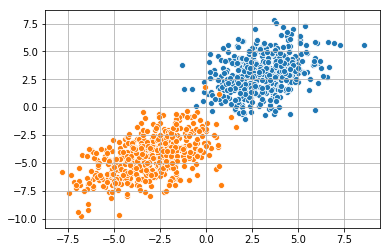

In [3]:
plt.grid(True)
sns.scatterplot(data1[:, 0], data1[:, 1])
sns.scatterplot(data2[:, 0], data2[:, 1])

In [4]:
data=np.concatenate((data1, data2), axis=0)
data=np.concatenate((data, np.zeros((data.shape[0],1))), axis=1)
print(data.shape)
data[500:,2]=1

(1000, 3)


In [5]:
np.random.shuffle(data)
print(data[:10])

[[-3.19091533 -3.46117354  1.        ]
 [-1.6010355  -0.71107093  1.        ]
 [-2.84308538 -3.06106366  1.        ]
 [-6.04335462 -6.07548521  1.        ]
 [-4.33906344 -7.79832553  1.        ]
 [-6.17754826 -6.45174976  1.        ]
 [-3.3857894  -5.81239666  1.        ]
 [-3.53095407 -3.21392187  1.        ]
 [-3.27583639 -6.04673535  1.        ]
 [ 3.43989998  2.41686077  0.        ]]


In [6]:
split=int(0.75*data.shape[0])
xtrain=data[:split, :-1]
ytrain=data[:split, -1]

xtest=data[split:, :-1]
ytest=data[split:, -1]

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(750, 2) (750,)
(250, 2) (250,)


In [7]:
#FUNCTIONS

def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))


def hypothesis(x_sample, w, b):
    h=(x_sample*w).sum()+b
    return sigmoid(h)

def get_error(x, w, y_true, b):
    err=0.0
    m=x.shape[0]
    
    for ix in range(m):      #L=-1[ylog(y^)]+(1-y)log(1-y^)]
        if y_true[ix]==0:
            add_term=-1*(np.log(1-hypothesis(x[ix], w, b)))
            err+=add_term
            
        else:
            add_term=-1*(np.log(hypothesis(x[ix], w, b)))
            err+=add_term
    err=err/m
    return err 

In [8]:
def get_gradients(x, w, y_true, b):
    
    grad_w = np.zeros(w.shape[0])
    grad_b = 0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix], w, b) - y_true[ix])*(x[ix])
        grad_b += (hypothesis(x[ix], w, b) - y_true[ix])*(1)
    
    return [grad_w, grad_b]

In [9]:
def optimizer(x, w, y_true, b, learningrate=0.001):
    error=get_error(x, w, y_true, b)
    grad_w, grad_b=get_gradients(x,w, y_true, b)
    b-=learningrate*grad_b
    w-=learningrate*grad_w
    return error, w, b

In [16]:
loss=[]
def logistic_regression(xtrain, ytrain, nb_epochs=200):
    
    
    w=np.array([0.3, 0.2])
    b=1.5
    
    for ix in range(nb_epochs):
        error, w, b=optimizer(xtrain, w, ytrain, b)
        loss.append(error)
    return w, b


[-1.91315476 -1.82813342] 0.35101853517976883


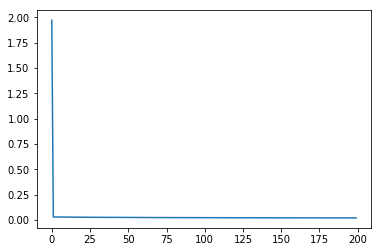

In [17]:
w1, b1=logistic_regression(xtrain, ytrain)
print(w1, b1)
plt.plot(loss)

In [18]:
acc=[]
for ix in range(xtest.shape[0]):
    if hypothesis(xtest[ix], w1 , b1)>0.5:
        acc.append(1)
    else:
        acc.append(0)
print((acc==ytest).sum()/250)        

0.992


In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
lr.coef_


array([[-1.39498455, -1.52519037]])

In [20]:
lr.intercept_

array([-0.56816847])

In [189]:
lr.score(xtest, ytest)

0.988

In [ ]:
#do this logistic regression for circles